<a href="https://colab.research.google.com/github/rkp74/MMSE-and-Regression/blob/main/RAJAN_KUMAR_CS_IT308_LAB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> IIIT Vadodara </center>
## <center> Winter 2022-23 </center>
## <center> CS/IT 308 Machine Learning Lab </center>
## <center> Lab#4 MMSE, Linear regression, and Logistic regression</center>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import misc
from numpy import linalg as la
import matplotlib.image as mpimg
import glob
from numpy import linalg as LA
import scipy.io as sio 

## <font color='blue'> MMSE

---

Refer class note



## <font color='red'> 1. Find the minimum mean squared error (MMSE) on following data.

In [ ]:
#write code here
def find_MSE(x,y):
    sum = 0
    for i in range(len(y)):
        sum = sum + ((x[i] - y[i])**2)
    MSE = sum/len(y)
#     print(MSE)
    return MSE
    
y = [11,20,19,17,10]
y_bar = [12,18,19.5,18,9]
MSE = find_MSE(y,y_bar)
print ("The Mean Square Error is: " , MSE)

The Mean Square Error is:  1.45


## <font color='red'> 2 Given a sample space $S_{XY}={(0,0),(1,1),(2,2),(2,3)}$, with equiprobable outcomes, i.e., $p(0,0)=p(1,1)=p(2,2)=p(2,3)=\frac{1}{4}$. Estimate $\hat{Y}$ given X.


$$\hat{Y}=E(Y)+\frac{COV(X,Y)}{VAR(X)}(X-E(X))$$

Also calculate the mean squared error between $\hat{Y}$ and $Y$.


Hint: You can use the classnotes for help.

In [ ]:
#write code here
#write code here
def find_MSE(x,y):
    sum = 0
    for i in range(len(y)):
        sum = sum + ((x[i] - y[i])**2)
    MSE = sum/len(y)
    return MSE

S = np.array([[0,0],[1,1],[2,2],[2,3]])
Exp_x = 0
Exp_y = 0
Exp_x2 = 0
var_x = 0
Co_var_xy = 0
sum = 0
y_hat = []

x_val = []
y_val = []
for i in range(len(S)):
    x_val.append(S[i][0])
    y_val.append(S[i][1])

#calculating the E(x)
for i in range(len(S)):
    Exp_x = Exp_x + ((S[i][0])*(0.25))
print("\nE(x) = ",Exp_x)
    
#calculating the E(y)
for i in range(len(S)):
    Exp_y = Exp_y + ((S[i][1])*(0.25))
print("\nE(y) = ",Exp_y)
    
#calculating the E(x^2)
for i in range(len(S)):
    Exp_x2 = Exp_x2 + (((S[i][0])**2)*(0.25))
print("\nE(x^2) = ",Exp_x2)    
    
#calculating the var(x)    
var_x = Exp_x2 - (Exp_x**2)
print("\nvar(x) = ",var_x)


#calculating the cov(x,y)
for i in range(len(S)):
  sum = sum + ((x_val[i]-np.average(x_val))*(y_val[i]-np.average(y_val)))
cov_var_xy = sum/len(S)
print("\ncov(x,y) = ",cov_var_xy)

#calculating the Y_hat
for i in range(len(S)):
    y_hat.append(Exp_y + (cov_var_xy/var_x)*(x_val[i]-Exp_x))

    
print("\nX |","Y |Y_hat")
for i in range(len(S)):
    print(x_val[i],y_val[i],y_hat[i])

print("\nMSE of Y and Y_hat is : ",find_MSE(y_val,y_hat))


E(x) =  1.25

E(y) =  1.5

E(x^2) =  2.25

var(x) =  0.6875

cov(x,y) =  0.875

X | Y |Y_hat
0 0 -0.09090909090909083
1 1 1.1818181818181819
2 2 2.4545454545454546
2 3 2.4545454545454546

MSE of Y and Y_hat is :  0.13636363636363635


## <font color='blue'> Linear regression

---

Refer class note



## <font color='red'> 3. Perform linear regression on the given dataset and observe underfitting and overfitting capacity of the function.

In [ ]:
#example of dataset:

no_samples = 10

#Generate n = np.random.rand(no_samples) # Here data is zero mean
no_samples = 10
n = np.random.rand(no_samples)
print(n)
#Generate x between 0 and 2 using number of smaples
# x=np.arange(0,2,4/(no_samples+10))
x=np.arange(0,2,2/(no_samples))
print(x)

#Generate function y dependent on x and n: y = x**2+2*n
y = x**2+2*n
print(y)

[0.00236741 0.20372491 0.38188358 0.85083672 0.01134685 0.64232648
 0.9707641  0.95908733 0.72961444 0.12526257]
[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8]
[0.00473482 0.44744982 0.92376716 2.06167345 0.66269371 2.28465296
 3.38152821 3.87817466 4.01922888 3.49052515]


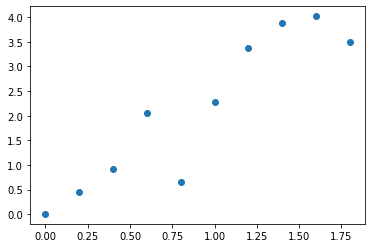

In [ ]:
# code to scatter plot x and y

plt.scatter(x,y)


#### Hint: Pseudo inverse
 $$Y = W^TX$$
 $$W = (X^TX)^{-1}X^TY$$ 

1. Take $y = \theta_0 + \theta_1 x$

In [ ]:
X1 = []
for i in x:
    X1.append([1,i])
W1 = np.linalg.pinv(X1).dot(y)
print(X1)
print(W1)

[[1, 0.0], [1, 0.2], [1, 0.4], [1, 0.6000000000000001], [1, 0.8], [1, 1.0], [1, 1.2000000000000002], [1, 1.4000000000000001], [1, 1.6], [1, 1.8]]
[0.02285759 2.32509477]


In [ ]:
#Generate X1 by concatinating ones and x as shown in output
X1 = []
for i in x:
    X1.append([1,i])

#Find W1 using pseudo inverse
W1 = np.linalg.pinv(X1).dot(y)

print(X1)
print(W1)

[[1, 0.0], [1, 0.2], [1, 0.4], [1, 0.6000000000000001], [1, 0.8], [1, 1.0], [1, 1.2000000000000002], [1, 1.4000000000000001], [1, 1.6], [1, 1.8]]
[0.02285759 2.32509477]


2. Take $y = \theta_0 + \theta_1 x + \theta_2 x^2 +\theta_3 x^3 +\theta_4 x^4+\theta_5 x^5$

In [ ]:
#Generate X2 by concatinating ones,x,x**2,x**3,x**4,x**5 
X2 = []
for i in x:
    X2.append([1,i,i**2,i**3,i**4,i**5])
#Generate W2 using: W2= la.inv(X2.T@X2)@X2.T@y
W2 = np.linalg.pinv(X2).dot(y)
print(X2)
print(W2)

[[1, 0.0, 0.0, 0.0, 0.0, 0.0], [1, 0.2, 0.04000000000000001, 0.008000000000000002, 0.0016000000000000003, 0.0003200000000000001], [1, 0.4, 0.16000000000000003, 0.06400000000000002, 0.025600000000000005, 0.010240000000000003], [1, 0.6000000000000001, 0.3600000000000001, 0.2160000000000001, 0.12960000000000008, 0.07776000000000005], [1, 0.8, 0.6400000000000001, 0.5120000000000001, 0.4096000000000001, 0.3276800000000001], [1, 1.0, 1.0, 1.0, 1.0, 1.0], [1, 1.2000000000000002, 1.4400000000000004, 1.7280000000000009, 2.073600000000001, 2.4883200000000016], [1, 1.4000000000000001, 1.9600000000000004, 2.7440000000000007, 3.8416000000000015, 5.378240000000003], [1, 1.6, 2.5600000000000005, 4.096000000000001, 6.553600000000001, 10.485760000000003], [1, 1.8, 3.24, 5.832000000000001, 10.4976, 18.895680000000002]]
[-0.06947482  5.32966047 -9.97982299  8.62957121 -0.93500037 -0.75544852]


In [ ]:
#Generate X4 by concatinating ones,x,x**2,x**3,x**4,x**5 
X4 = []
for i in x:
    X4.append([1,i,i**2,i**3,i**4,i**5,i**6,i**7,i**8,i**9])
#Generate W2 using: W2= la.inv(X2.T@X2)@X2.T@y
W4 = np.linalg.pinv(X4).dot(y)
print(X4)
print(W4)

[[1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1, 0.2, 0.04000000000000001, 0.008000000000000002, 0.0016000000000000003, 0.0003200000000000001, 6.400000000000002e-05, 1.2800000000000005e-05, 2.5600000000000013e-06, 5.120000000000002e-07], [1, 0.4, 0.16000000000000003, 0.06400000000000002, 0.025600000000000005, 0.010240000000000003, 0.0040960000000000015, 0.0016384000000000006, 0.0006553600000000003, 0.0002621440000000001], [1, 0.6000000000000001, 0.3600000000000001, 0.2160000000000001, 0.12960000000000008, 0.07776000000000005, 0.046656000000000045, 0.027993600000000028, 0.01679616000000002, 0.010077696000000013], [1, 0.8, 0.6400000000000001, 0.5120000000000001, 0.4096000000000001, 0.3276800000000001, 0.2621440000000001, 0.20971520000000007, 0.1677721600000001, 0.13421772800000006], [1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1, 1.2000000000000002, 1.4400000000000004, 1.7280000000000009, 2.073600000000001, 2.4883200000000016, 2.985984000000003, 3.5831808000000036, 4.29981696

3. Take $y = \theta_0 + \theta_1 x + \theta_2 x^2 $

In [ ]:
#Generate X3 by concatinating ones,x,x**2 
X3 = []
for i in x:
    X3.append([1,i,i**2])
#Generate W3 using: W2= la.inv(X3.T@X3)@X3.T@y
W3 = np.linalg.pinv(X3).dot(y)

print(X3)
print(W3)

[[1, 0.0, 0.0], [1, 0.2, 0.04000000000000001], [1, 0.4, 0.16000000000000003], [1, 0.6000000000000001, 0.3600000000000001], [1, 0.8, 0.6400000000000001], [1, 1.0, 1.0], [1, 1.2000000000000002, 1.4400000000000004], [1, 1.4000000000000001, 1.9600000000000004], [1, 1.6, 2.5600000000000005], [1, 1.8, 3.24]]
[-0.11423406  2.83918845 -0.2856076 ]


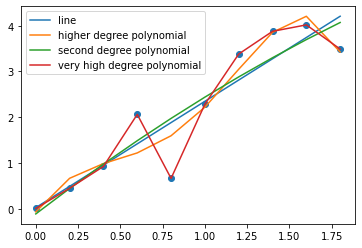

In [ ]:
fig = plt.figure()
plt.scatter(x,y)

#Generate y_p1 = X1@W1
#Generate y_p2 = X2@W2
#Generate y_p3 = X3@W3
y_p1=np.array(X1).dot(W1)
y_p2=np.array(X2).dot(W2)
y_p3=np.array(X3).dot(W3)
y_p4=np.array(X4).dot(W4)

#Plot x,y_p1
#plot x,y_p2
#plot x,y_p3
plt.plot(x,y_p1)
plt.plot(x,y_p2)
plt.plot(x,y_p3)
plt.plot(x,y_p4)
plt.legend(["line","higher degree polynomial","second degree polynomial","very high degree polynomial"])


## <font color='blue'> Brief about **Gradient descent**:
---


Given a system $Ax=b$, we find $x$ for given observations $b$ and coeffiecient matrix $A$. When $b$ is not in column space of $A$, then $Ax \neq b$ and we need to find $x$ in such a way that $Ax \approx b$.

<br>
Linear least square is one of the methods to estimate $x$ by minimizing the mean square error as, $\min ||Ax-b||_2$. This can be written as,
        
$\underset{x}{\mathrm{argmin}}||Ax-b||_{2}^{2} = f(x)$

We need to find $x$ in such a way that $f(x)$ will be minimum in $L_2$ norm. 

<br>


We will solve this by applying gradient descent algortithm on $f(x)$. 
<br>
To apply this algorithm we need to find gradient of the function, i.e.,
<br>
              $\Delta_x f(x)= A^T(Ax-b) = A^TAx-A^Tb$

<br>


Optimisation for least-squares
<br>
$||A^TAx-A^Tb||_2>\delta$, $\delta$ is the small positive number indicating tolerance.

<br>

Now we will find new x iteratively using step size $\alpha$ to find the best fit for $AX=b$ as:

<br>
$x^{[n+1]}=x^{[n]}-\alpha (A^TAx-A^Tb)$.
<br>

We need to choose $\alpha$, $\delta$ and $x^{[0]}$ to iterate until $x^{[n+1]} \rightarrow x^{[n]}$.

##  <font color='blue'> Logistic regression

---
Cost funcion for logistic regression,
$$
\begin{aligned}
J(\theta) &=\frac{1}{m} \sum_{i=1}^{m} \cos t\left(h_{\theta}\left(x^{i}\right), y^{\prime}\right) \\
&=-\frac{1}{m}\left[\sum_{i=1}^{m} y^{i} \log h_{\theta}\left(x^{i}\right)+\left(1-y^{i}\right)\right.\log \left(1-\log \left(x^{i}\right)\right]\\
h(x)&=\frac{1}{1+e^{-\Theta^Tx}}
\end{aligned}
$$
So, using gradient descent
$$
\Theta_{i+1}=\Theta_{i}-\frac{\alpha}{m} \sum_{i=1}^{m}\left(h\left(x^{i} \Theta\right)-y^{i}\right)
$$
iterate till $$
\Theta_{i+1} \cong \Theta_{i}
$$




## <font color='red'> 4. Perform logistic regression on the dataset given below.
Here, to classify 2D data,
decision line can be given as,
$$\theta_0+\theta_1x+\theta_2y=0$$
Let, $$\Theta^T=\begin{bmatrix}
\theta_0\\
\theta_1\\
\theta_2
\end{bmatrix}$$

In [ ]:
#Dataset example

X = np.array([[0,0,0],[0,1,0],[0,2,0],[0,3,1],[1,0,0],[1,1,0],[1,2,1],[1,3,1],[2,0,0],[2,1,1],[2,2,1],[2,3,1]])
Xb =X
print("x|y|class")
print(Xb)

x|y|class
[[0 0 0]
 [0 1 0]
 [0 2 0]
 [0 3 1]
 [1 0 0]
 [1 1 0]
 [1 2 1]
 [1 3 1]
 [2 0 0]
 [2 1 1]
 [2 2 1]
 [2 3 1]]


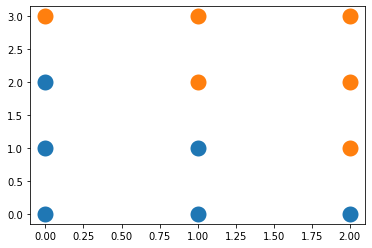

In [ ]:
#Generate scatter plot of X
uq = np.unique(Xb[:,-1])
for i in uq:
    cl1 = Xb[Xb[:,-1]==i]
    plt.scatter(cl1[:,0], cl1[:,1],linewidth=10)

In [ ]:
# Generate X by concatinating ones and X
X=[]
Y=[]
for i,j,c in Xb:
    X.append([1,i,j])
    Y.append(c)
X=np.array(X)
Y=np.array(Y)
print(X,Y)

[[1 0 0]
 [1 0 1]
 [1 0 2]
 [1 0 3]
 [1 1 0]
 [1 1 1]
 [1 1 2]
 [1 1 3]
 [1 2 0]
 [1 2 1]
 [1 2 2]
 [1 2 3]] [0 0 0 1 0 0 1 1 0 1 1 1]


In [ ]:
#write code for gradient descent to find thetas
def sigmoid(sd):
    return 1.0/(1.0+np.exp(-sd))

def px(wt,X):
    s=np.array(wt[0]*np.array(X[:,0])+wt[1]*np.array(X[:,1])+wt[2]*np.array(X[:,2]))
    return sigmoid(s)

def gradient(wt,X,Y):
    y_pred=px(wt,X)
    y_pred=np.array([1 if p >= 0.5 else 0 for p in y_pred])
    gt=[0]*X.shape[1]
    for i in range(X.shape[1]):
        gt[i]=-1*np.sum(Y*(1-y_pred)*X[:,i]-(1-Y)*y_pred*X[:,i])
    return gt

def descent(wt_new,wt_prev,lr):
    epochs=0
    while True:
        wt_prev=wt_new
        gt=gradient(wt_prev,X,Y)
        w0=wt_prev[0]-lr*gt[0]
        w1=wt_prev[1]-lr*gt[1]
        w2=wt_prev[2]-lr*gt[2]
        wt_new=[w0,w1,w2]

        if (wt_new[0]-wt_prev[0])**2+(wt_new[1]-wt_prev[1])**2+(wt_new[2]-wt_prev[2])**2<pow(10,-6):
            return wt_new
        
        if epochs>100:
            return wt_new
        epochs+=1
        
wt=[1,1,1]
wt=descent(wt,wt,0.009)
print("Theta", wt)

Theta [-0.26000000000000034, 0.11799999999999974, 0.11799999999999974]


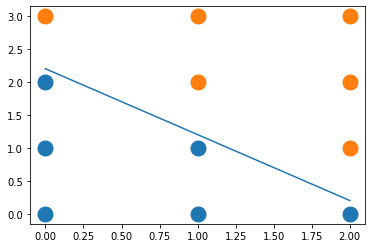

In [ ]:
#plot decision boundry 
uq = np.unique(Xb[:,-1])
for i in uq:
    cl1 = Xb[Xb[:,-1]==i]
    plt.scatter(cl1[:,0], cl1[:,1],linewidth=10)

x=np.linspace(0,2,10)
y=(-wt[0]-wt[1]*x)/wt[2]
plt.plot(x,y)